Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

Data Collection & Analysis

In [2]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('D:\Major_Project\dataset\Dataset-2\Dataset-2.csv')

In [3]:
# printing the first 5 rows of the dataframe
parkinsons_data.head()

,ID,Recording,Status,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,...,Shi_APQ11,HNR05,HNR15,HNR25,HNR35,HNR38,RPDE,DFA,PPE,GNE
0,CONT-01,1,0,1,0.25546,0.000015,0.001467,0.001673,0.030256,0.26313,...,0.021882,5.943.796.582,6.073.624.859,7.188.286.388,7.762.672.931,7.753.804.238,0.250433,0.599346,0.005397,0.900404
1,CONT-01,2,0,1,0.36964,0.000022,0.001932,0.002245,0.023146,0.20217,...,0.016828,5.983.889.542,6.265.559.894,7.437.866.864,7.998.922.811,8.026.978.338,0.271445,0.581242,0.075617,0.887042
2,CONT-01,3,0,1,0.23514,0.000013,0.001353,0.001546,0.019338,0.16710,...,0.013038,5.729.380.773,6.185.833.645,7.366.529.735,7.893.050.194,7.903.350.989,0.203531,0.600759,0.005283,0.889399
3,CONT-02,1,0,0,0.2932,0.000017,0.001105,0.001444,0.024716,0.20892,...,0.018330,621.795.726,6.867.820.519,7.983.998.418,843.676.822,8.425.243.013,0.261360,0.625216,0.030518,0.875984
4,CONT-02,2,0,0,0.23075,0.000015,0.001073,0.001404,0.013119,0.11607,...,0.011037,6.753.402.425,7.497.685.811,8.572.742.038,9.103.396.742,9.114.518.943,0.222069,0.602493,0.035602,0.902206


In [4]:
# number of rows and columns in the dataframe
parkinsons_data.shape

(240, 22)

TypeError: unhashable type: 'numpy.ndarray'

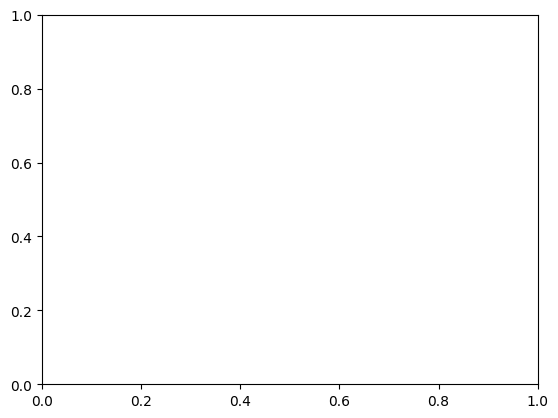

In [5]:
plt.plot(parkinsons_data);
plt.show()

In [20]:
for column in parkinsons_data.columns:
    if parkinsons_data[column].dtype == 'object':
        parkinsons_data = parkinsons_data.drop(column, axis=1)

In [21]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Recording   240 non-null    int64  
 1   Status      240 non-null    int64  
 2   Gender      240 non-null    int64  
 3   Jitter_abs  240 non-null    float64
 4   Jitter_RAP  240 non-null    float64
 5   Jitter_PPQ  240 non-null    float64
 6   Shim_loc    240 non-null    float64
 7   Shim_dB     240 non-null    float64
 8   Shim_APQ3   240 non-null    float64
 9   Shim_APQ5   240 non-null    float64
 10  Shi_APQ11   240 non-null    float64
 11  RPDE        240 non-null    float64
 12  DFA         240 non-null    float64
 13  PPE         240 non-null    float64
 14  GNE         240 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 28.2 KB


In [22]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

Recording     0
Status        0
Gender        0
Jitter_abs    0
Jitter_RAP    0
Jitter_PPQ    0
Shim_loc      0
Shim_dB       0
Shim_APQ3     0
Shim_APQ5     0
Shi_APQ11     0
RPDE          0
DFA           0
PPE           0
GNE           0
dtype: int64

In [23]:
# getting some statistical measures about the data
parkinsons_data.describe()

,Recording,Status,Gender,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,Shim_APQ3,Shim_APQ5,Shi_APQ11,RPDE,DFA,PPE,GNE
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,2.000000,0.500000,0.400000,0.000044,0.003172,0.003532,0.038428,0.509062,0.021499,0.023468,0.028671,0.310517,0.612911,0.271958,0.917801
std,0.818203,0.501045,0.490922,0.000045,0.003373,0.004449,0.023213,1.685121,0.013787,0.014402,0.016610,0.065639,0.077780,0.229851,0.033911
min,1.000000,0.000000,0.000000,0.000007,0.000678,0.001036,0.007444,0.064989,0.003344,0.004103,0.006459,0.162762,0.411359,0.004127,0.847307
25%,1.000000,0.000000,0.000000,0.000019,0.001551,0.001867,0.024336,0.211785,0.012910,0.014985,0.019180,0.263217,0.556756,0.040811,0.891408
50%,2.000000,0.500000,0.000000,0.000035,0.002337,0.002870,0.032960,0.287885,0.018571,0.019897,0.024909,0.305054,0.606502,0.246486,0.912809
75%,3.000000,1.000000,1.000000,0.000056,0.003678,0.003991,0.045475,0.399860,0.025784,0.027900,0.033757,0.349273,0.661144,0.405402,0.946479
max,3.000000,1.000000,1.000000,0.000550,0.043843,0.065199,0.192600,17.476000,0.113240,0.120760,0.142440,0.535953,0.784376,0.908395,0.987292


In [24]:
# distribution of target Variable
parkinsons_data['Status'].value_counts()

0    120
1    120
Name: Status, dtype: int64

1  --> Parkinson's Positive

0 --> Healthy


In [25]:
# grouping the data bas3ed on the target variable
parkinsons_data.groupby('Status').mean()

,Recording,Gender,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,Shim_APQ3,Shim_APQ5,Shi_APQ11,RPDE,DFA,PPE,GNE
Status,,,,,,,,,,,,,,
0,2.0,0.45,0.000040,0.002486,0.002787,0.032928,0.287586,0.018054,0.019978,0.025368,0.305291,0.613922,0.241934,0.927783
1,2.0,0.35,0.000049,0.003858,0.004277,0.043928,0.730539,0.024945,0.026959,0.031974,0.315743,0.611899,0.301983,0.907820


Data Pre-Processing

Separating the features & Target

In [26]:
X = parkinsons_data.drop(columns=['Status'], axis=1)
Y = parkinsons_data['Status']

In [27]:
print(X)

     Recording  Gender  Jitter_abs  Jitter_RAP  Jitter_PPQ  Shim_loc  Shim_dB  \
0            1       1    0.000015    0.001467    0.001673  0.030256  0.26313   
1            2       1    0.000022    0.001932    0.002245  0.023146  0.20217   
2            3       1    0.000013    0.001353    0.001546  0.019338  0.16710   
3            1       0    0.000017    0.001105    0.001444  0.024716  0.20892   
4            2       0    0.000015    0.001073    0.001404  0.013119  0.11607   
..         ...     ...         ...         ...         ...       ...      ...   
235          2       0    0.000037    0.003701    0.005149  0.016868  0.14928   
236          3       0    0.000015    0.001270    0.001497  0.017923  0.16720   
237          1       0    0.000022    0.001354    0.001615  0.028040  0.24182   
238          2       0    0.000037    0.002724    0.002258  0.064605  0.58002   
239          3       0    0.000028    0.001746    0.002060  0.019914  0.17087   

     Shim_APQ3  Shim_APQ5  

In [28]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
235    1
236    1
237    1
238    1
239    1
Name: Status, Length: 240, dtype: int64


Splitting the data to training data & Test data

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(240, 14) (192, 14) (48, 14)


Data Standardization

In [31]:
scaler = StandardScaler()

In [32]:
scaler.fit(X_train)

StandardScaler()

In [33]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [34]:
print(X_train)

[[ 1.23598654 -0.81826965 -0.18213214 ...  1.80031826  1.82680713
  -0.14255422]
 [ 1.23598654 -0.81826965 -0.66566336 ... -1.22568458 -0.69965504
   1.55735038]
 [ 1.23598654 -0.81826965 -0.15339552 ...  0.97879414 -0.96592801
   1.39731387]
 ...
 [-1.22317838 -0.81826965 -0.46604754 ...  0.57139073  1.93386456
  -0.17112637]
 [-1.22317838  1.22209103 -0.35444919 ...  0.3714079  -0.0735832
   1.37681414]
 [-1.22317838 -0.81826965  2.04660988 ...  0.80669159  1.58015082
  -1.49121583]]


Model Training

Support Vector Machine Model

Accuracy score of training data using Kernel Value :-  linear  :  0.765625 



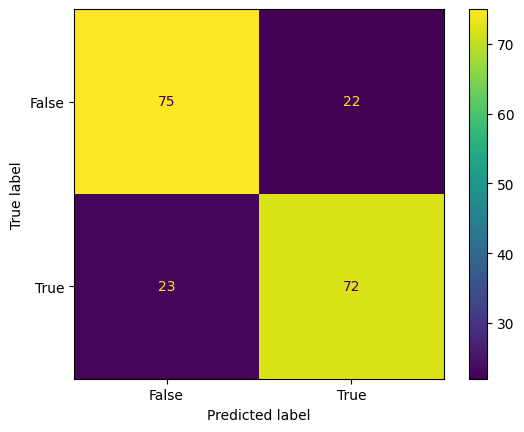

Accuracy score of training data using Kernel Value :-  poly  :  0.6666666666666666 



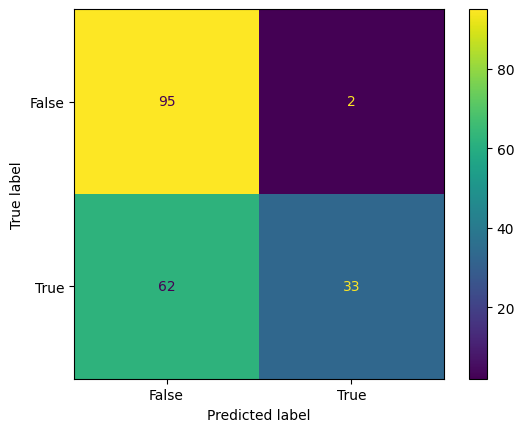

Accuracy score of training data using Kernel Value :-  rbf  :  0.7760416666666666 



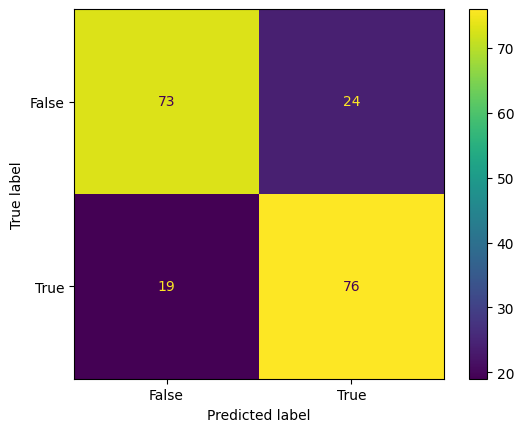

Accuracy score of training data using Kernel Value :-  sigmoid  :  0.5833333333333334 



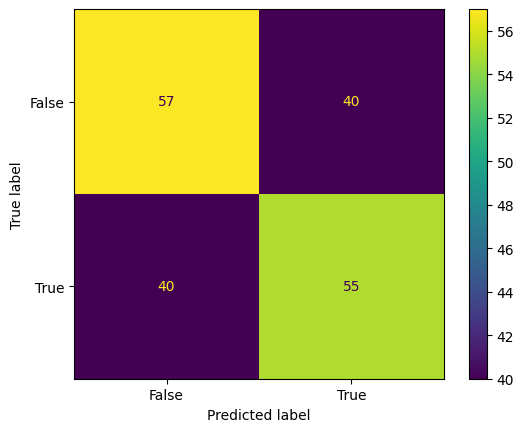

Accuracy score of training data using RF is :-  0.9947916666666666
Accuracy score of training data using GNB is :-  0.5885416666666666
Accuracy score of training data using XGB is :-  0.5833333333333334


In [35]:
kernelValues = ['linear', 'poly','rbf', 'sigmoid']
model_RF = RandomForestClassifier(n_estimators = 100, random_state=1)
model_GNB = GaussianNB()
model_XGB = xgb.XGBClassifier()
for v in kernelValues:
    model = svm.SVC(kernel=v)
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
    confusion_matrix =  metrics.confusion_matrix(Y_train, X_train_prediction)
    print('Accuracy score of training data using Kernel Value :- ', v," : ", training_data_accuracy,"\n")
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()

model_RF.fit(X_train,Y_train)
model_GNB.fit(X_train, Y_train)
model_XGB.fit(X_train, Y_train)
x_pred_xgb = model.predict(X_train)
x_pred_rf = model_RF.predict(X_train)
x_pred_gnb = model_GNB.predict(X_train)
accuracy_rf = accuracy_score(Y_train, x_pred_rf)
accuracy_gnb = accuracy_score(Y_train, x_pred_gnb)
accuracy_xgb = accuracy_score(Y_train, x_pred_xgb)
print('Accuracy score of training data using RF is :- ', accuracy_rf )
print('Accuracy score of training data using GNB is :- ', accuracy_gnb )
print('Accuracy score of training data using XGB is :- ', accuracy_xgb )

In [36]:
# training the SVM model with training data
model.fit(X_train, Y_train)

SVC(kernel='sigmoid')

Model Evaluation

Accuracy Score

In [37]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [38]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.5833333333333334


In [39]:
# accuracy score on training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [40]:
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.5625


Building a Predictive System

In [ ]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")


[0]
The Person does not have Parkinsons Disease
